<a href="https://colab.research.google.com/github/gitmystuff/DSChunks/blob/main/Analysis_of_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Variance (ANOVA)

You use ANOVA when you have a continuous (numeric) outcome variable and you want to test if its mean is significantly different across three or more categories (groups) of a categorical variable.

## One Way ANOVA

- https://www.statology.org/one-way-anova/
- https://www.itl.nist.gov/div898/handbook/ppc/section2/ppc231.htm
- https://en.wikipedia.org/wiki/One-way_analysis_of_variance
- https://towardsdatascience.com/anova-test-with-python-cfbf4013328b

**Hypothesis**:
- $H_0:; \mu_1 = \mu_2 = \mu_3$
- We could test each pair
    * $H_0: \mu_1 = \mu_2, \alpha = 0.05$
    * $H_0: \mu_1 = \mu_3, \alpha = 0.05$
    * $H_0: \mu_2 = \mu_3, \alpha = 0.05$
- Overall confidence drops: .95 x .95 x .95 = .857
- ANOVA works by computing an F value and compares it to a critical value determined by our degrees of freedom which is determined by the number of groups and number of items in each group
- Considers two types of variance:
    * Between Groups: group mean varies from total mean
    * Within Groups: individual mean varies from group mean
- The F value is the ratio between these two variances

$
F = \frac{Variance Between Groups}{Variance Within Groups} = \frac{\frac{SSG}{df_{groups}}}{\frac{SSE}{df_{error}}} = \frac{\frac{SSG}{ngroups-1}}{\frac{SSE}{(n_{rows}-1)*n_{groups}}}
$

Variance revisited:
- $\frac{SS}{df} = \frac{\sum(x - \bar{x})^2}{n - 1}$

## Degrees of Freedom

https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/


### Assumptions of ANOVA
- Errors are normally distributed
- Homoscedasticity or Homogeneity of variances
- Independent samples
- Continuous dependent variable

## F Distribution Used in Analysis of Variance (ANOVA)

- z and t answers the question 'What is the probability that two samples come from the same population?'
- What is the probability that two samples come from populations that have the same variance?
- What is the probability that three or more samples come from the same population?
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html
- http://pytolearn.csd.auth.gr/d1-hyptest/11/f-distro.html

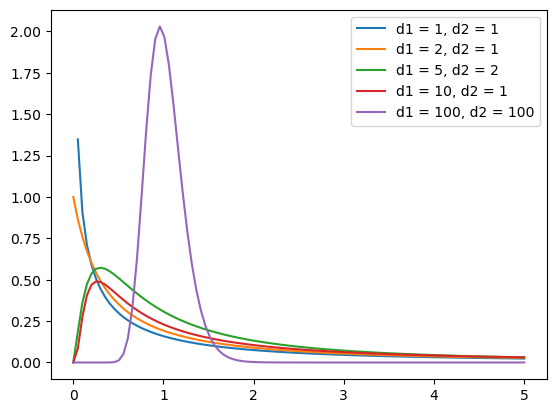

In [ ]:
# plotting f distribution pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

x = np.linspace(0, 5, 100)
y1 = f.pdf(x, 1, 1)
plt.plot(x, y1, label=f'd1 = 1, d2 = 1')
y2 = f.pdf(x, 2, 1)
plt.plot(x, y2, label=f'd1 = 2, d2 = 1')
y3 = f.pdf(x, 5, 2)
plt.plot(x, y3, label=f'd1 = 5, d2 = 2')
y4 = f.pdf(x, 10, 1)
plt.plot(x, y4, label=f'd1 = 10, d2 = 1')
y5 = f.pdf(x, 100, 100)
plt.plot(x, y5, label=f'd1 = 100, d2 = 100')

plt.legend();

   Group1  Group2  Group3
0      38      63      51
1      59      26      62
2      53      70      59
3      42      63      53
4      39      44      50
5      53      53      51
6      54      45      54
7      38      30      42
8      40      50      66
9      24      56      42
SSG = 25.0 + 1.0 + 16.0 = 42.0 * 10 = 420.0
df_groups = ngroups - 1 = 2
SSE = SSE1 + SSE2 + SSE3 = 3370.0
df_errors = (nrows - 1) * ngroups = 27
f statistic:  1.682
critical value:  3.354


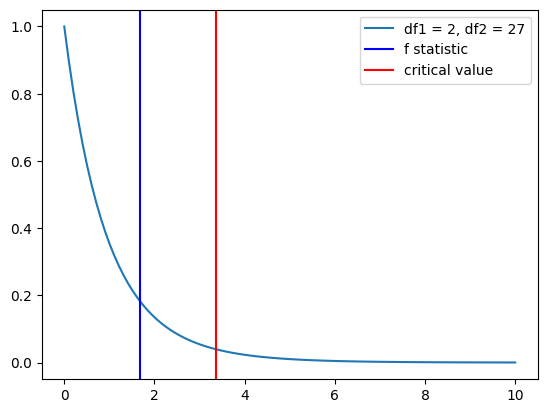

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

data = {'Group1': [38, 59, 53, 42, 39, 53, 54, 38, 40, 24],
'Group2': [63, 26, 70, 63, 44, 53, 45, 30, 50, 56],
'Group3': [51, 62, 59, 53, 50, 51, 54, 42, 66, 42]}

anova_df = pd.DataFrame(data)
print(anova_df.head(10))

# sum of squares groups
g1_mean = anova_df['Group1'].mean()
g2_mean = anova_df['Group2'].mean()
g3_mean = anova_df['Group3'].mean()
tot_mean = sum(anova_df.mean())/anova_df.shape[1]
SSG1 = (g1_mean - tot_mean)**2
SSG2 = (g2_mean - tot_mean)**2
SSG3 = (g3_mean - tot_mean)**2

SSG = (SSG1 + SSG2 + SSG3) * anova_df.shape[0]
print(f'SSG = {SSG1} + {SSG2} + {SSG3} = {SSG1 + SSG2 + SSG3} * {anova_df.shape[0]} = {SSG}')
df_groups = anova_df.shape[1] - 1
print(f'df_groups = ngroups - 1 = {df_groups}')

# sum of squares error
SSE1 = [(i - g1_mean)**2 for i in anova_df['Group1']]
SSE2 = [(i - g2_mean)**2 for i in anova_df['Group2']]
SSE3 = [(i - g3_mean)**2 for i in anova_df['Group3']]

SSE = sum(SSE1 + SSE2 + SSE3)
print(f'SSE = SSE1 + SSE2 + SSE3 = {SSE}')
df_errors = (anova_df.shape[0] - 1) * anova_df.shape[1]
print(f'df_errors = (nrows - 1) * ngroups = {df_errors}')

# get f statistic
f_stat = (SSG/df_groups)/(SSE/df_errors)
print('f statistic: ', np.round(f_stat, 3))

cv = stats.f.ppf(q=1-.05, dfn=2, dfd=27)
print('critical value: ', np.round(cv, 3))

# visualize with plot
x = np.linspace(0, 10, 100)
y = stats.f.pdf(x, df_groups, df_errors)
plt.plot(x, y, label=f'df1 = {df_groups}, df2 = {df_errors}')
plt.axvline(x=f_stat, color='b', label='f statistic')
plt.axvline(x=cv, color='r', label='critical value')

plt.legend();

Since f is lest than $f_{critical}$, or 1.718 < 3.354, we fail to reject the hypothesis. We don't have enough evidence to show there are differences between the groups.

## Two Way ANOVA

The transition from a one-way to a two-way ANOVA is simply moving from one categorical factor to two categorical factors (independent variables). This allows you to test three distinct hypotheses simultaneously

- Tests two independent variables at the same time
- Rows are organized as blocks
- Goal is to isolate and remove any variance contributed by the blocks, to better understand the variance in the groups

One-Way ANOVA involves **one categorical factor** (also known as the independent variable) and groups continuous values.

**The Structure of One-Way ANOVA**

A One-Way ANOVA tests the effect of **one categorical independent variable** on a **continuous dependent variable**.

| Variable | Role in the Test | Data Type | Example |
| :--- | :--- | :--- | :--- |
| **Independent Variable (Factor)** | The groups being compared. | **Categorical** (Nominal) | **Teaching Method** (e.g., Lecture, Online, Workshop) |
| **Dependent Variable (Outcome)** | The scores or measurements you are comparing. | **Continuous** (Interval/Ratio) | **Exam Score** (e.g., 85, 92, 78) |

The **continuous values** (like the exam scores) are the *data points* within the test, and they are what you are comparing the means of. The **categorical factor** (like Teaching Method) simply defines *which group* each continuous value belongs to.

| Teaching Method | Exam Scores (Continuous Values) |
| :--- | :--- |
| **Lecture** | 85, 88, 91, 79 |
| **Online** | 92, 95, 90, 97 |
| **Workshop** | 78, 81, 84, 80 |

The ANOVA test then checks: **Are the average Exam Scores for the Lecture group, the Online group, and the Workshop group significantly different from each other?**

**In Summary**

| Statistical Test | Independent Variable(s) | Dependent Variable |
| :--- | :--- | :--- |
| **One-Way ANOVA** | **1 Categorical** Factor | **1 Continuous** Variable |
| **Two-Way ANOVA** | **2 Categorical** Factors | **1 Continuous** Variable |


        Group1  Group2
Block                 
Block1       9      10
Block2      10      12
Block3      11      14
SSG = (SSG1 + SSG2) * nblocks = 2.0 * 3 = 6.0

        Group1  Group2  BlockMeans
Block                             
Block1       9      10         9.5
Block2      10      12        11.0
Block3      11      14        12.5

Total Mean: 11.0
SSB = 9.0
SST = 16.0
SSE = SST - SSG - SSB = 1.0
df_groups = 1
df_errors = 2
f statistic = 12.0
critical value = 18.513


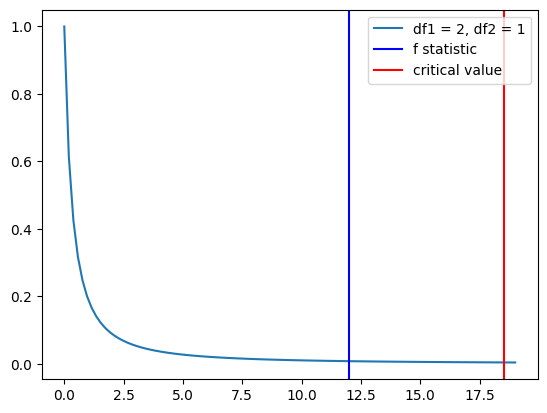

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# set up two way df
data = {'Block': ['Block1', 'Block2', 'Block3' ], 'Group1': [9, 10, 11], 'Group2': [10, 12, 14]}
two_way_df = pd.DataFrame(data)
two_way_df.set_index('Block', inplace=True)
print(two_way_df.head())

# sum of squares groups
g1_mean = two_way_df['Group1'].mean()
g2_mean = two_way_df['Group2'].mean()
tot_mean = sum(two_way_df.mean())/two_way_df.shape[1]
SSG1 = (g1_mean - tot_mean)**2
SSG2 = (g2_mean - tot_mean)**2

SSG = (SSG1 + SSG2) * two_way_df.shape[0]
print(f'SSG = (SSG1 + SSG2) * nblocks = {SSG1 + SSG2} * {two_way_df.shape[0]} = {SSG}\n')

# add block means
two_way_df['BlockMeans'] = two_way_df.mean(axis=1)
print(two_way_df.head())

# total mean
tot_mean = sum(two_way_df.mean())/two_way_df.shape[1]
print('\nTotal Mean:', tot_mean)

# sum of squares block
SSB = sum([(i - tot_mean)**2 for i in two_way_df['BlockMeans']]) * 2
print(f'SSB = {SSB}')

# sum of squares total
SST = sum(sum([(i[1] - tot_mean)**2 for i in two_way_df.drop('BlockMeans', axis=1).iterrows()]))
print('SST =', SST)

# SSE
SSE = SST - SSG - SSB
print(f'SSE = SST - SSG - SSB = {SSE}')

# degrees of freedom
df_groups = two_way_df.drop('BlockMeans', axis=1).shape[1] - 1
print(f'df_groups = {df_groups}')

# df_errors changes to allow for SSB
df_errors = (two_way_df.drop('BlockMeans', axis=1).shape[0] - 1) * (two_way_df.drop('BlockMeans', axis=1).shape[1] - 1)
print(f'df_errors = {df_errors}')

f_stat = (SSG/df_groups)/(SSE/df_errors)
print(f'f statistic = {f_stat}')

cv = stats.f.ppf(1 - .05, dfn=df_groups, dfd=df_errors)
print('critical value =', np.round(cv, 3))

# visualize with plot
x = np.linspace(0, 19, 100)
y = stats.f.pdf(x, df_errors, df_groups)
plt.plot(x, y, label=f'df1 = {df_errors}, df2 = {df_groups}')
plt.axvline(x=f_stat, color='b', label='f statistic')
plt.axvline(x=cv, color='r', label='critical value')

plt.legend();

## Two-way ANOVA with Replication

A two-way ANOVA with replication is a statistical test used to determine if there are **significant differences** between the means of groups that have been split on **two independent factors (or variables)**, while also examining the **interaction** between these two factors. Replication means that for every combination of the levels of the two factors, you have **multiple observations** (i.e., more than one subject or data point).

**Key Components**

A two-way ANOVA with replication tests three main hypotheses:

1.  **Main Effect of Factor A:** Whether the means differ across the levels of the first factor (e.g., across different drug types).
2.  **Main Effect of Factor B:** Whether the means differ across the levels of the second factor (e.g., across different dosages).
3.  **Interaction Effect (A x B):** Whether the effect of Factor A depends on the level of Factor B (and vice versa). This is often the most important finding, indicating that the factors do not act independently.

**Sample Data Structure**

Imagine a study testing the effect of **"Fertilizer Type" (Factor A)** and **"Watering Frequency" (Factor B)** on **"Plant Height" (Dependent Variable)**.

* **Factor A (Fertilizer Type):** Has 2 levels (Type 1, Type 2).
* **Factor B (Watering Frequency):** Has 3 levels (Low, Medium, High).
* **Replication ($n$):** We measure the height of **3** plants (replications) for *each* unique combination of Fertilizer Type and Watering Frequency.

| Fertilizer Type (Factor A) | Watering Frequency (Factor B) | Plant Height Measurements (cm) |
| :------------------------- | :---------------------------- | :----------------------------- |
| Type 1                     | Low                           | 12, 11, 13                     |
| Type 1                     | Medium                        | 18, 19, 17                     |
| Type 1                     | High                          | 25, 24, 26                     |
| Type 2                     | Low                           | 15, 14, 16                     |
| Type 2                     | Medium                        | 21, 22, 20                     |
| Type 2                     | High                          | 28, 27, 29                     |

*In this example, there are $2 \times 3 = 6$ treatment groups, and $6 \times 3 = 18$ total observations (plant heights).*

**Importance of Replication**

Replication is crucial because it allows the ANOVA to estimate the **within-group variability (error)**, which is essential for determining if the differences between the group means are truly due to the factors or simply random chance. It is also required to test for the **interaction effect**.


## More ANOVA

- Two-Way ANOVA with replication
- ANCOVA
- MANOVA
- MANCOVA

http://www.statsmakemecry.com/smmctheblog/stats-soup-anova-ancova-manova-mancova

## Feature Selection with ANOVA

In [ ]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split

grades = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/class-grades.csv', index_col=False)
grades.drop(['Quiz', 'Student', 'Attendance'], axis=1, inplace=True)
print(grades.shape)
print(grades.head())

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)

X_train['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_train['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_train['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_train['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
X_train['Activity 2'].fillna(X_train['Activity 2'].round(decimals=2).mean(), inplace=True)

X_test['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_test['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_test['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_test['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
X_test['Activity 2'].fillna(X_test['Activity 2'].round(decimals=2).mean(), inplace=True)
print(X_train.shape, X_test.shape)
print(X_train.info())

(98, 8)
   Prefix  Assignment  Tutorial  Midterm  Final  FinalGrade  Activity 1  \
0       5       57.14     34.09    64.38  52.50          54       79.46   
1       8       95.05    105.49    67.50  68.33          81       27.37   
2       8       83.70     83.17    30.00  48.89          55        2.50   
3       7       81.22     96.06    49.38  80.56          71       74.14   
4       8       91.32       NaN    95.00  73.89          89       83.36   

   Activity 2  
0         NaN  
1         NaN  
2       13.57  
3         NaN  
4         NaN  
(78, 7) (20, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 49 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      78 non-null     int64  
 1   Assignment  78 non-null     float64
 2   Tutorial    78 non-null     float64
 3   Midterm     78 non-null     float64
 4   Final       78 non-null     float64
 5   Activity 1  78 non-null     float6

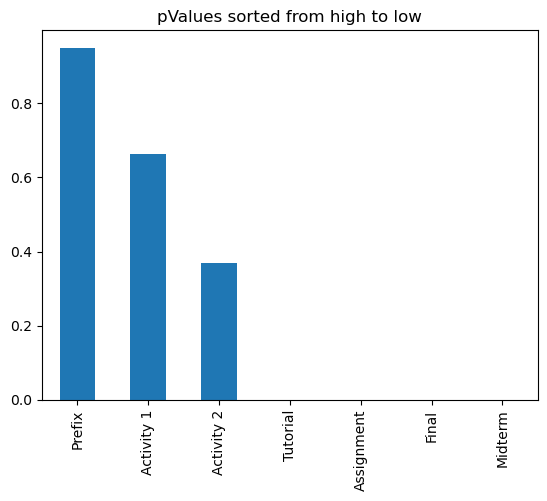

In [ ]:
# identify best features using f_regression and pvalues
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile

model = f_regression(X_train, y_train)
model = pd.Series(model[1])
model.index = X_train.columns
plt.title('pValues sorted from high to low')
model.sort_values(ascending=False).plot.bar();

In [ ]:
# keep best percentage of features (lowest p values)
keepers = SelectPercentile(f_regression, percentile=60).fit(X_train, y_train)
X_train.columns[keepers.get_support()]

Index(['Assignment', 'Tutorial', 'Midterm', 'Final'], dtype='object')